# 3. Split the data into training and validation (70-30)
⬜ ⬜ ⬜ 💣 ➡ 🎽 + 👌

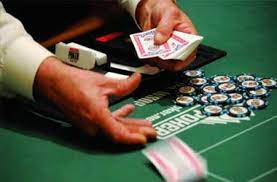

The objective is to split the annotated data into training and validation. 70-30 seems a good split

In [5]:
annotator_ID=20 # my folder ID

my_drive_path="/content/drive/MyDrive/HOME_EXAM/data"
path_to_tiles= my_drive_path+"/annotated_data/train/"+str(annotator_ID)

# define split for training and validation
split_train= 0.7 #
split_val=1-split_train

In [6]:
path_to_tiles

'/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20'

In [ ]:
annotator_ID="full_data" # change this to your folder ID

my_drive_path="/content/drive/MyDrive/HOME_EXAM/data"
path_to_tiles= my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/all_data"

# define split for training and validation
split_train= 0.7 #
split_val=1-split_train

## 3.1 Load libraries

In [2]:
import os
import shutil
import random

# mount google drive
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3.2 Create train and validation directories and subdivide each into "images" and "labels" sub-directories

In [7]:
os.path.join(path_to_tiles, "train")

'/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20/train'

In [9]:
train_dir = os.path.join(path_to_tiles, "train")
os.makedirs(train_dir, exist_ok=True) # creates new directory for training data
val_dir = os.path.join(path_to_tiles, "val")
os.makedirs(val_dir, exist_ok=True) # creates new directory for validation data
val_img_dir = os.path.join(path_to_tiles, "val","images")
os.makedirs(val_img_dir, exist_ok=True) # creates new directory for training data
train_img_dir = os.path.join(path_to_tiles, "train","images")
os.makedirs(train_img_dir, exist_ok=True) # creates new directory for training data
val_ann_dir = os.path.join(path_to_tiles, "val","labels")
os.makedirs(val_ann_dir, exist_ok=True) # creates new directory for training data
train_ann_dir = os.path.join(path_to_tiles, "train","labels")
os.makedirs(train_ann_dir, exist_ok=True) # creates new directory for training data


### 3.3 Randomly sample tiles

In [27]:
# Get a list of all the .txt files in the data directory
txt_files = [f for f in os.listdir(path_to_tiles) if f.endswith(".txt")]
img_files = [f for f in os.listdir(path_to_tiles) if f.endswith(".tif")]

In [ ]:
os.listdir(path_to_tiles)

In [19]:
# remove .txt files that have no image (not sure why ?)
txt_files_with_tif = []
for txt_file in txt_files:
    # get the base name of the text file
    txt_base_name = os.path.basename(txt_file)
    # replace the file extension with .tif to get the corresponding tif file name
    img_file = os.path.join(os.path.dirname(txt_file), os.path.splitext(txt_base_name)[0] + '.tif')
    img_file=path_to_tiles+"/"+img_file
    #print("txt: "+txt_file)
    #print("tif: "+img_file)
    # check if the tif file exists
    if os.path.exists(img_file):
      #print("path to image " + img_file + " does not exist!")
      txt_files_with_tif.append(txt_file)



In [20]:
txt_files=txt_files_with_tif

# Shuffle the list of text files
random.shuffle(txt_files)
#train=random.sample(txt_files, )

# Calculate the number of files for the train and validation sets
train_size = int(0.7 * len(txt_files))
val_size = len(txt_files) - train_size

In [21]:
val_size

0

### Move the text annotation files and respective images to the train and validation directories

In [13]:
# iterate through each annotated .txt file
for i, txt_file in enumerate(txt_files):
    if i < train_size:
        dest_dir = train_dir
    else:
        dest_dir = val_dir
    #print("path to "+path_to_tiles+"/"+txt_file+" exists: "+ str(os.path.exists(txt_file)))
    if os.path.exists(path_to_tiles+"/"+txt_file):
      src_file = os.path.join(path_to_tiles, txt_file)
      src_img = os.path.join(path_to_tiles, os.path.splitext(txt_file)[0]+".tif")
      if os.path.exists(src_img):
        dest_file = os.path.join(dest_dir,"labels", txt_file)
        dest_img = os.path.join(dest_dir,"images", os.path.splitext(txt_file)[0]+".tif")
        #print("copying files")
        shutil.move(src_file, dest_file)
        shutil.move(src_img, dest_img)

## And now for the whole group's tiles
Go back up and run this time the script block with the group's annotations